# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [15]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities

['hilo',
 'albany',
 'oranjemund',
 'samusu',
 'taolanaro',
 'thompson',
 'iqaluit',
 'aklavik',
 'atuona',
 'mastic beach',
 'karratha',
 'rikitea',
 'tuktoyaktuk',
 'kings mountain',
 'dikson',
 'bilibino',
 'busselton',
 'belushya guba',
 'kapaa',
 'kaitangata',
 'airai',
 'cape town',
 'lebu',
 'carnarvon',
 'khatanga',
 'jamestown',
 'port blair',
 'karpathos',
 'te anau',
 'barentsburg',
 'gat',
 'balykshi',
 'ushuaia',
 'banda aceh',
 'domodossola',
 'zhanatas',
 'esperance',
 'corinto',
 'port elizabeth',
 'ventanas',
 'herat',
 'bull savanna',
 'sobolevo',
 'amos',
 'salinopolis',
 'sosnovskiy',
 'grand gaube',
 'hattiesburg',
 'kismayo',
 'yangjiang',
 'saldanha',
 'bredasdorp',
 'belaya gora',
 'punta arenas',
 'tiksi',
 'madhubani',
 'nefteyugansk',
 'lolua',
 'nelson bay',
 'saint-philippe',
 'hermanus',
 'lahij',
 'kaeo',
 'nabire',
 'arraial do cabo',
 'mataura',
 'new norfolk',
 'souillac',
 'sorsk',
 'bluff',
 'tikhvin',
 'avarua',
 'lysyye gory',
 'rocha',
 'acapulco'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [16]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
city = "Seoul"

#Set get url 
url = base_url + "appid=" + api_key + "&q=" + city + "&units=imperial"

response = requests.get(url)
response_json = response.json()
response_json

{'coord': {'lon': 126.98, 'lat': 37.57},
 'weather': [{'id': 701,
   'main': 'Mist',
   'description': 'mist',
   'icon': '50n'}],
 'base': 'stations',
 'main': {'temp': 62.01,
  'pressure': 1026,
  'humidity': 100,
  'temp_min': 59,
  'temp_max': 64.4},
 'visibility': 1600,
 'wind': {'speed': 1.12, 'deg': 60},
 'clouds': {'all': 1},
 'dt': 1569451806,
 'sys': {'type': 1,
  'id': 5501,
  'message': 0.0088,
  'country': 'KR',
  'sunrise': 1569446551,
  'sunset': 1569489888},
 'timezone': 32400,
 'id': 1835848,
 'name': 'Seoul',
 'cod': 200}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [24]:
cities_df = pd.DataFrame({
    "City":cities,
    "Cloudiness":np.nan,
    "Country": np.nan,
    "Humidity":np.nan,
    "Max Temp":np.nan,
    "Wind Speed":np.nan
})

cities_df.head()

,City,Cloudiness,Country,Humidity,Max Temp,Wind Speed
0,hilo,NaN,NaN,NaN,NaN,NaN
1,albany,NaN,NaN,NaN,NaN,NaN
2,oranjemund,NaN,NaN,NaN,NaN,NaN
3,samusu,NaN,NaN,NaN,NaN,NaN
4,taolanaro,NaN,NaN,NaN,NaN,NaN


In [36]:
for index, row in cities_df[0:631].iterrows():
    try:
        #All query and param data must be within indentation
        row = row.copy()
        city= row['City']
        print(city)

        url = "http://api.openweathermap.org/data/2.5/weather?"

        query_url = url + "appid=" + api_key + "&q=" + city + "&units=imperial"
        print(query_url)
        
        #API call
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        weather_json

        #Write info to df
        cities_df.at[index,"Max Temp"]= weather_json["main"]["temp"]
        cities_df.at[index,"Humidity"]= weather_json["main"]["humidity"]
        cities_df.at[index,"Cloudiness"]= weather_json["clouds"]["all"]
        cities_df.at[index,"Wind Speed"]= weather_json["wind"]["speed"]
        cities_df.at[index,"lat"]= weather_json["coord"]["lat"]
        cities_df.at[index,"lon"]= weather_json["coord"]["lon"]
        
    #Error exception for cities with no data
    except KeyError:
        print(f"No data in, {row.copy()} keep NaN in df.")

#Display the df
cities_df

hilo
http://api.openweathermap.org/data/2.5/weather?appid=e11045d8d16fd101b27270b2d23ac69e&q=hilo&units=imperial
albany
http://api.openweathermap.org/data/2.5/weather?appid=e11045d8d16fd101b27270b2d23ac69e&q=albany&units=imperial
oranjemund
http://api.openweathermap.org/data/2.5/weather?appid=e11045d8d16fd101b27270b2d23ac69e&q=oranjemund&units=imperial
samusu
http://api.openweathermap.org/data/2.5/weather?appid=e11045d8d16fd101b27270b2d23ac69e&q=samusu&units=imperial
No data in, City          samusu
Cloudiness       NaN
Country          NaN
Humidity         NaN
Max Temp         NaN
Wind Speed       NaN
Temp             NaN
lat              NaN
lon              NaN
Name: 3, dtype: object keep NaN in df.
taolanaro
http://api.openweathermap.org/data/2.5/weather?appid=e11045d8d16fd101b27270b2d23ac69e&q=taolanaro&units=imperial
No data in, City          taolanaro
Cloudiness          NaN
Country             NaN
Humidity            NaN
Max Temp            NaN
Wind Speed          NaN
Temp     

saldanha
http://api.openweathermap.org/data/2.5/weather?appid=e11045d8d16fd101b27270b2d23ac69e&q=saldanha&units=imperial
bredasdorp
http://api.openweathermap.org/data/2.5/weather?appid=e11045d8d16fd101b27270b2d23ac69e&q=bredasdorp&units=imperial
belaya gora
http://api.openweathermap.org/data/2.5/weather?appid=e11045d8d16fd101b27270b2d23ac69e&q=belaya gora&units=imperial
punta arenas
http://api.openweathermap.org/data/2.5/weather?appid=e11045d8d16fd101b27270b2d23ac69e&q=punta arenas&units=imperial
tiksi
http://api.openweathermap.org/data/2.5/weather?appid=e11045d8d16fd101b27270b2d23ac69e&q=tiksi&units=imperial
madhubani
http://api.openweathermap.org/data/2.5/weather?appid=e11045d8d16fd101b27270b2d23ac69e&q=madhubani&units=imperial
nefteyugansk
http://api.openweathermap.org/data/2.5/weather?appid=e11045d8d16fd101b27270b2d23ac69e&q=nefteyugansk&units=imperial
lolua
http://api.openweathermap.org/data/2.5/weather?appid=e11045d8d16fd101b27270b2d23ac69e&q=lolua&units=imperial
No data in, City

hithadhoo
http://api.openweathermap.org/data/2.5/weather?appid=e11045d8d16fd101b27270b2d23ac69e&q=hithadhoo&units=imperial
kajaani
http://api.openweathermap.org/data/2.5/weather?appid=e11045d8d16fd101b27270b2d23ac69e&q=kajaani&units=imperial
birjand
http://api.openweathermap.org/data/2.5/weather?appid=e11045d8d16fd101b27270b2d23ac69e&q=birjand&units=imperial
bengkulu
http://api.openweathermap.org/data/2.5/weather?appid=e11045d8d16fd101b27270b2d23ac69e&q=bengkulu&units=imperial
No data in, City          bengkulu
Cloudiness         NaN
Country            NaN
Humidity           NaN
Max Temp           NaN
Wind Speed         NaN
Temp               NaN
lat                NaN
lon                NaN
Name: 118, dtype: object keep NaN in df.
salamiyah
http://api.openweathermap.org/data/2.5/weather?appid=e11045d8d16fd101b27270b2d23ac69e&q=salamiyah&units=imperial
nouadhibou
http://api.openweathermap.org/data/2.5/weather?appid=e11045d8d16fd101b27270b2d23ac69e&q=nouadhibou&units=imperial
tual
http:

lishui
http://api.openweathermap.org/data/2.5/weather?appid=e11045d8d16fd101b27270b2d23ac69e&q=lishui&units=imperial
saleaula
http://api.openweathermap.org/data/2.5/weather?appid=e11045d8d16fd101b27270b2d23ac69e&q=saleaula&units=imperial
No data in, City          saleaula
Cloudiness         NaN
Country            NaN
Humidity           NaN
Max Temp           NaN
Wind Speed         NaN
Temp               NaN
lat                NaN
lon                NaN
Name: 168, dtype: object keep NaN in df.
mocambique
http://api.openweathermap.org/data/2.5/weather?appid=e11045d8d16fd101b27270b2d23ac69e&q=mocambique&units=imperial
No data in, City          mocambique
Cloudiness           NaN
Country              NaN
Humidity             NaN
Max Temp             NaN
Wind Speed           NaN
Temp                 NaN
lat                  NaN
lon                  NaN
Name: 169, dtype: object keep NaN in df.
barbar
http://api.openweathermap.org/data/2.5/weather?appid=e11045d8d16fd101b27270b2d23ac69e&q=barb

No data in, City          toliary
Cloudiness        NaN
Country           NaN
Humidity          NaN
Max Temp          NaN
Wind Speed        NaN
Temp              NaN
lat               NaN
lon               NaN
Name: 216, dtype: object keep NaN in df.
manali
http://api.openweathermap.org/data/2.5/weather?appid=e11045d8d16fd101b27270b2d23ac69e&q=manali&units=imperial
calafell
http://api.openweathermap.org/data/2.5/weather?appid=e11045d8d16fd101b27270b2d23ac69e&q=calafell&units=imperial
sasebo
http://api.openweathermap.org/data/2.5/weather?appid=e11045d8d16fd101b27270b2d23ac69e&q=sasebo&units=imperial
vila velha
http://api.openweathermap.org/data/2.5/weather?appid=e11045d8d16fd101b27270b2d23ac69e&q=vila velha&units=imperial
kodiak
http://api.openweathermap.org/data/2.5/weather?appid=e11045d8d16fd101b27270b2d23ac69e&q=kodiak&units=imperial
mehamn
http://api.openweathermap.org/data/2.5/weather?appid=e11045d8d16fd101b27270b2d23ac69e&q=mehamn&units=imperial
walvis bay
http://api.openweatherma

ambilobe
http://api.openweathermap.org/data/2.5/weather?appid=e11045d8d16fd101b27270b2d23ac69e&q=ambilobe&units=imperial
beloit
http://api.openweathermap.org/data/2.5/weather?appid=e11045d8d16fd101b27270b2d23ac69e&q=beloit&units=imperial
nykoping
http://api.openweathermap.org/data/2.5/weather?appid=e11045d8d16fd101b27270b2d23ac69e&q=nykoping&units=imperial
ust-nera
http://api.openweathermap.org/data/2.5/weather?appid=e11045d8d16fd101b27270b2d23ac69e&q=ust-nera&units=imperial
mnogovershinnyy
http://api.openweathermap.org/data/2.5/weather?appid=e11045d8d16fd101b27270b2d23ac69e&q=mnogovershinnyy&units=imperial
sung noen
http://api.openweathermap.org/data/2.5/weather?appid=e11045d8d16fd101b27270b2d23ac69e&q=sung noen&units=imperial
maracaibo
http://api.openweathermap.org/data/2.5/weather?appid=e11045d8d16fd101b27270b2d23ac69e&q=maracaibo&units=imperial
alta floresta
http://api.openweathermap.org/data/2.5/weather?appid=e11045d8d16fd101b27270b2d23ac69e&q=alta floresta&units=imperial
el faiyu

No data in, City          fort saint john
Cloudiness                NaN
Country                   NaN
Humidity                  NaN
Max Temp                  NaN
Wind Speed                NaN
Temp                      NaN
lat                       NaN
lon                       NaN
Name: 329, dtype: object keep NaN in df.
meiktila
http://api.openweathermap.org/data/2.5/weather?appid=e11045d8d16fd101b27270b2d23ac69e&q=meiktila&units=imperial
kununurra
http://api.openweathermap.org/data/2.5/weather?appid=e11045d8d16fd101b27270b2d23ac69e&q=kununurra&units=imperial
oban
http://api.openweathermap.org/data/2.5/weather?appid=e11045d8d16fd101b27270b2d23ac69e&q=oban&units=imperial
umm kaddadah
http://api.openweathermap.org/data/2.5/weather?appid=e11045d8d16fd101b27270b2d23ac69e&q=umm kaddadah&units=imperial
bur gabo
http://api.openweathermap.org/data/2.5/weather?appid=e11045d8d16fd101b27270b2d23ac69e&q=bur gabo&units=imperial
No data in, City          bur gabo
Cloudiness         NaN
Country     

No data in, City          grand river south east
Cloudiness                       NaN
Country                          NaN
Humidity                         NaN
Max Temp                         NaN
Wind Speed                       NaN
Temp                             NaN
lat                              NaN
lon                              NaN
Name: 386, dtype: object keep NaN in df.
bima
http://api.openweathermap.org/data/2.5/weather?appid=e11045d8d16fd101b27270b2d23ac69e&q=bima&units=imperial
tapaua
http://api.openweathermap.org/data/2.5/weather?appid=e11045d8d16fd101b27270b2d23ac69e&q=tapaua&units=imperial
No data in, City          tapaua
Cloudiness       NaN
Country          NaN
Humidity         NaN
Max Temp         NaN
Wind Speed       NaN
Temp             NaN
lat              NaN
lon              NaN
Name: 388, dtype: object keep NaN in df.
belton
http://api.openweathermap.org/data/2.5/weather?appid=e11045d8d16fd101b27270b2d23ac69e&q=belton&units=imperial
amderma
http://api.openwe

rabo de peixe
http://api.openweathermap.org/data/2.5/weather?appid=e11045d8d16fd101b27270b2d23ac69e&q=rabo de peixe&units=imperial
atbasar
http://api.openweathermap.org/data/2.5/weather?appid=e11045d8d16fd101b27270b2d23ac69e&q=atbasar&units=imperial
yusva
http://api.openweathermap.org/data/2.5/weather?appid=e11045d8d16fd101b27270b2d23ac69e&q=yusva&units=imperial
No data in, City          yusva
Cloudiness      NaN
Country         NaN
Humidity        NaN
Max Temp        NaN
Wind Speed      NaN
Temp            NaN
lat             NaN
lon             NaN
Name: 440, dtype: object keep NaN in df.
stromness
http://api.openweathermap.org/data/2.5/weather?appid=e11045d8d16fd101b27270b2d23ac69e&q=stromness&units=imperial
moerai
http://api.openweathermap.org/data/2.5/weather?appid=e11045d8d16fd101b27270b2d23ac69e&q=moerai&units=imperial
berdigestyakh
http://api.openweathermap.org/data/2.5/weather?appid=e11045d8d16fd101b27270b2d23ac69e&q=berdigestyakh&units=imperial
sao joao da barra
http://api.op

sambava
http://api.openweathermap.org/data/2.5/weather?appid=e11045d8d16fd101b27270b2d23ac69e&q=sambava&units=imperial
jalu
http://api.openweathermap.org/data/2.5/weather?appid=e11045d8d16fd101b27270b2d23ac69e&q=jalu&units=imperial
agua dulce
http://api.openweathermap.org/data/2.5/weather?appid=e11045d8d16fd101b27270b2d23ac69e&q=agua dulce&units=imperial
amiens
http://api.openweathermap.org/data/2.5/weather?appid=e11045d8d16fd101b27270b2d23ac69e&q=amiens&units=imperial
awjilah
http://api.openweathermap.org/data/2.5/weather?appid=e11045d8d16fd101b27270b2d23ac69e&q=awjilah&units=imperial
saint albans
http://api.openweathermap.org/data/2.5/weather?appid=e11045d8d16fd101b27270b2d23ac69e&q=saint albans&units=imperial
san fernando
http://api.openweathermap.org/data/2.5/weather?appid=e11045d8d16fd101b27270b2d23ac69e&q=san fernando&units=imperial
puerto leguizamo
http://api.openweathermap.org/data/2.5/weather?appid=e11045d8d16fd101b27270b2d23ac69e&q=puerto leguizamo&units=imperial
rawlins
http

umzimvubu
http://api.openweathermap.org/data/2.5/weather?appid=e11045d8d16fd101b27270b2d23ac69e&q=umzimvubu&units=imperial
No data in, City          umzimvubu
Cloudiness          NaN
Country             NaN
Humidity            NaN
Max Temp            NaN
Wind Speed          NaN
Temp                NaN
lat                 NaN
lon                 NaN
Name: 551, dtype: object keep NaN in df.
mayya
http://api.openweathermap.org/data/2.5/weather?appid=e11045d8d16fd101b27270b2d23ac69e&q=mayya&units=imperial
mogwase
http://api.openweathermap.org/data/2.5/weather?appid=e11045d8d16fd101b27270b2d23ac69e&q=mogwase&units=imperial
batemans bay
http://api.openweathermap.org/data/2.5/weather?appid=e11045d8d16fd101b27270b2d23ac69e&q=batemans bay&units=imperial
rock sound
http://api.openweathermap.org/data/2.5/weather?appid=e11045d8d16fd101b27270b2d23ac69e&q=rock sound&units=imperial
roald
http://api.openweathermap.org/data/2.5/weather?appid=e11045d8d16fd101b27270b2d23ac69e&q=roald&units=imperial
plata

,City,Cloudiness,Country,Humidity,Max Temp,Wind Speed,Temp,lat,lon
0,hilo,1.0,NaN,55.0,83.17,11.41,83.17,19.71,-155.08
1,albany,1.0,NaN,68.0,63.48,2.28,63.48,42.65,-73.75
2,oranjemund,0.0,NaN,35.0,71.55,12.82,71.55,-28.55,16.43
3,samusu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,taolanaro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,thompson,20.0,NaN,29.0,51.80,17.22,51.80,55.74,-97.86
6,iqaluit,75.0,NaN,80.0,39.11,12.75,39.11,63.75,-68.52
7,aklavik,20.0,NaN,56.0,43.52,4.70,43.52,68.22,-135.01
8,atuona,81.0,NaN,77.0,79.54,20.49,79.54,-9.80,-139.03
9,mastic beach,1.0,NaN,60.0,68.70,6.93,68.70,40.77,-72.85


In [34]:
cities_df.head()
cities_df.to_csv(r'/cities_df.csv') # Saving to CSV

,City,Cloudiness,Country,Humidity,Max Temp,Wind Speed,Temp,lat,lon
0,hilo,1.0,NaN,55.0,NaN,11.41,83.17,19.71,-155.08
1,albany,1.0,NaN,68.0,NaN,2.28,63.48,42.65,-73.75
2,oranjemund,0.0,NaN,35.0,NaN,12.82,71.55,-28.55,16.43
3,samusu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,taolanaro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

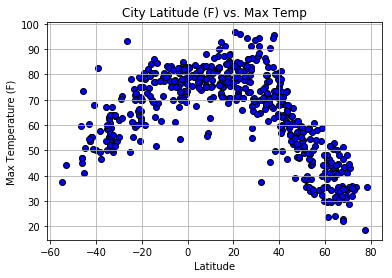

In [37]:
plt.scatter(cities_df['lat'], cities_df['Max Temp'], marker="o", facecolors="blue", edgecolors="black")

#Format scatter plot
plt.title("City Latitude (F) vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

plt.savefig("Temperature.png") # Saving to PNG
plt.show()

#### Latitude vs. Humidity Plot

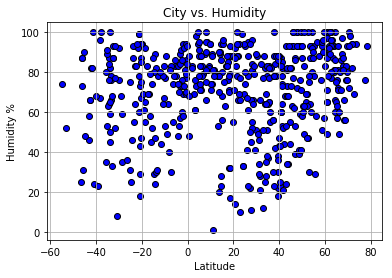

In [38]:
plt.scatter(cities_df['lat'], cities_df['Humidity'], marker="o", facecolors="blue", edgecolors="black")

#Format scatter plot
plt.title("City vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid(True)

plt.savefig("humidity.png") # Saving to PNG
plt.show()

#### Latitude vs. Cloudiness Plot

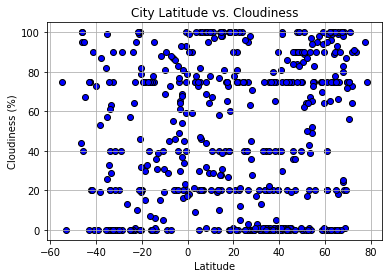

In [39]:
plt.scatter(cities_df['lat'], cities_df['Cloudiness'], marker="o", facecolors="blue", edgecolors="black")

#Format scatter plot
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.savefig("cloudiness.png") # Saving to PNG
plt.show()

#### Latitude vs. Wind Speed Plot

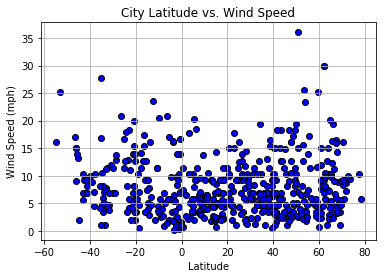

In [40]:
plt.scatter(cities_df['lat'], cities_df['Wind Speed'], marker="o", facecolors="blue", edgecolors="black")

#Format scatter plot
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

plt.savefig("wind_speed.png") # Saving to PNG
plt.show()